<a href="https://colab.research.google.com/github/aSafarpoor/DIP/blob/main/DIP_hw4_99210301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW4
* name: **Ali Safarpoor Dehkordi**
* sid: **99210301**


# imports:

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm


In [3]:
!wget https://www.dropbox.com/s/9sakh5x8h1rrrip/HW4.zip

--2022-06-09 12:29:00--  https://www.dropbox.com/s/9sakh5x8h1rrrip/HW4.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9sakh5x8h1rrrip/HW4.zip [following]
--2022-06-09 12:29:01--  https://www.dropbox.com/s/raw/9sakh5x8h1rrrip/HW4.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9488baaa0ce6a6c511a8c93e18.dl.dropboxusercontent.com/cd/0/inline/Bm4GGXoaUr0tnox24ZM5a1ziv084Q--igfP7QTkp54WjTnIvwZXuPRMeypg3lddr678Icwf0tJ5uoTKGxEq91YN0UMhYj3dmMJksl7CoUyG6ylAUVupdpak63m-cmN3hrGW61WZRCYZ9u7dPRZjewufZk0KbaPWN2MyziznZTuR1tg/file# [following]
--2022-06-09 12:29:01--  https://uc9488baaa0ce6a6c511a8c93e18.dl.dropboxusercontent.com/cd/0/inline/Bm4GGXoaUr0tnox24ZM5a1ziv084Q--igfP7QTkp54WjTnIvwZXuPRMeypg3lddr678Icwf0tJ5uoTKGxEq

In [4]:
import zipfile
with zipfile.ZipFile("HW4.zip","r") as zip_ref:
    zip_ref.extractall("HW4-data")

#Q1

In [5]:
!pwd 
!ls

/content
'blacked.png?raw=true'	 HW4-data   HW4.zip   sample_data


In [6]:
%cd HW4-data/edge\ folder/
!ls

/content/HW4-data/edge folder
barbara.bmp    house.tif       mandril_gray.tif  woman_blonde.tif
boat.png       jetplane.tif    peppers_gray.tif  woman_darkhair.tif
cameraman.tif  lake.tif        pirate.tif
fruits.png     lena.bmp        tulips.png
HappyFish.jpg  livingroom.tif  walkbridge.tif


In [7]:
!ls

barbara.bmp    house.tif       mandril_gray.tif  woman_blonde.tif
boat.png       jetplane.tif    peppers_gray.tif  woman_darkhair.tif
cameraman.tif  lake.tif        pirate.tif
fruits.png     lena.bmp        tulips.png
HappyFish.jpg  livingroom.tif  walkbridge.tif


In [8]:
import subprocess 
 
filenames = subprocess.check_output(["ls"]).decode("utf-8") 
filenames = filenames.split('\n')[:-1]

In [9]:
filenames

['barbara.bmp',
 'boat.png',
 'cameraman.tif',
 'fruits.png',
 'HappyFish.jpg',
 'house.tif',
 'jetplane.tif',
 'lake.tif',
 'lena.bmp',
 'livingroom.tif',
 'mandril_gray.tif',
 'peppers_gray.tif',
 'pirate.tif',
 'tulips.png',
 'walkbridge.tif',
 'woman_blonde.tif',
 'woman_darkhair.tif']

In [10]:
image_path = filenames[0]
img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)

In [11]:
# based on https://stackoverflow.com/questions/2448015/2d-convolution-using-python-and-numpy
def convolution2d(image, kernel, bias=0):
    kernel = np.flip(kernel)
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in tqdm(range(y)):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
    return new_image

## sobel

In [12]:
class sobelEdgeDetector:
    def __init__(self):
        self.sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
        self.sobel_x = np.copy(self.sobel_y).transpose()
        print(self.sobel_x,'\n\n',self.sobel_y)

    def convolution2d(self, image, kernel, bias=0):
        kernel = np.flip(kernel)
        m, n = kernel.shape
        if (m == n):
            y, x = image.shape
            y = y - m + 1
            x = x - m + 1
            new_image = np.zeros((y,x))
            for i in tqdm(range(y)):
                for j in range(x):
                    new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
        return new_image
    
    def detect(self,img):
        imgx = self.convolution2d(img,self.sobel_x)
        imgy = self.convolution2d(img,self.sobel_y)
        return imgx+imgy

In [13]:
sed = sobelEdgeDetector()
sedimg = sed.detect(img)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 510/510 [00:02<00:00, 240.40it/s]


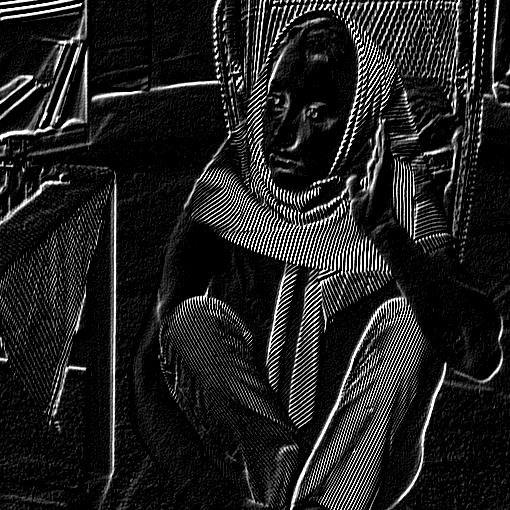

In [14]:
cv2_imshow(sedimg)

## canny

In [15]:
class cannyEdgeDetector:
  def __init__(self, sigma=1, kernel_size=5, lowthreshold=0.05, highthreshold=0.15, weak_pixel=75, strong_pixel=255):
    self.sigma = sigma
    self.kernel_size = kernel_size
    self.lowThreshold = lowthreshold
    self.highThreshold = highthreshold
    self.weak_pixel = weak_pixel
    self.strong_pixel = strong_pixel
    return 
  
  def convolution2d(self, image, kernel, bias=0):
        kernel = np.flip(kernel)
        m, n = kernel.shape
        if (m == n):
            y, x = image.shape
            y = y - m + 1
            x = x - m + 1
            new_image = np.zeros((y,x))
            for i in tqdm(range(y)):
                for j in range(x):
                    new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
        return new_image

  # Step 1: Noise reduction: Apply Gaussian filter to smooth the image in order to remove the noise
  def gaussian_kernel(self, size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g
  
  # Step 2: Gradient calculation: Find the intensity gradients of the image
  def sobel_filters(self, img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    Ix = cv2.filter2D(img, -1, Kx)
    Iy = cv2.filter2D(img, -1, Ky)

    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255.0
    theta = np.arctan2(Iy, Ix)
    return (G, theta)
  
  # step 3: Non-Maximum Suppression: Apply non-maximum suppression to get rid of spurious response to edge detection
  def non_max_suppression(self, img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1,M-1):
      for j in range(1,N-1):
        try:
          q = 255
          r = 255

          #angle 0
          if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
            q = img[i, j+1]
            r = img[i, j-1]
          #angle 45
          elif (22.5 <= angle[i,j] < 67.5):
            q = img[i+1, j-1]
            r = img[i-1, j+1]
          #angle 90
          elif (67.5 <= angle[i,j] < 112.5):
            q = img[i+1, j]
            r = img[i-1, j]
          #angle 135
          elif (112.5 <= angle[i,j] < 157.5):
            q = img[i-1, j-1]
            r = img[i+1, j+1]

          if (img[i,j] >= q) and (img[i,j] >= r):
            Z[i,j] = img[i,j]
          else:
            Z[i,j] = 0

        except IndexError as e:
            pass

    return Z

  # Step 4: Double threshold: Apply double threshold to determine potential edges
  def threshold(self, img):
    highThreshold = img.max() * self.highThreshold
    lowThreshold = highThreshold * self.lowThreshold

    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)

    weak = np.int32(self.weak_pixel)
    strong = np.int32(self.strong_pixel)

    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)

    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return (res)

  def hysteresis(self, img):

    M, N = img.shape
    weak = self.weak_pixel
    strong = self.strong_pixel

    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass

    return img
  
  def detect(self,img):   
    
    img_smoothed = self.convolution2d(img, self.gaussian_kernel(self.kernel_size, self.sigma))
    gradientMat, thetaMat = self.sobel_filters(img_smoothed)
    nonMaxImg = self.non_max_suppression(gradientMat, thetaMat)
    thresholdImg = self.threshold(nonMaxImg)
    img_final = self.hysteresis(thresholdImg)
    return img_final

In [16]:
ced = cannyEdgeDetector()
cedimg = sed.detect(img)

100%|██████████| 510/510 [00:03<00:00, 138.90it/s]


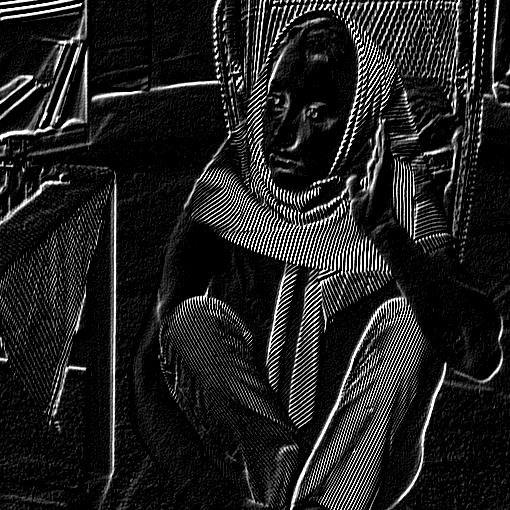

In [17]:
cv2_imshow(cedimg)

## Prewitt

In [18]:
class prewittEdgeDetector:
    def __init__(self):
        self.prewitt_y = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
        self.prewitt_x = np.copy(self.prewitt_y).transpose()
        print(self.prewitt_x,'\n\n',self.prewitt_y)

    def convolution2d(self, image, kernel, bias=0):
        kernel = np.flip(kernel)
        m, n = kernel.shape
        if (m == n):
            y, x = image.shape
            y = y - m + 1
            x = x - m + 1
            new_image = np.zeros((y,x))
            for i in tqdm(range(y)):
                for j in range(x):
                    new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
        return new_image
    
    def detect(self,img):
        imgx = self.convolution2d(img,self.prewitt_x)
        imgy = self.convolution2d(img,self.prewitt_y)
        return imgx+imgy

In [19]:
ped = prewittEdgeDetector()
pedimg = ped.detect(img)

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 207.20it/s]


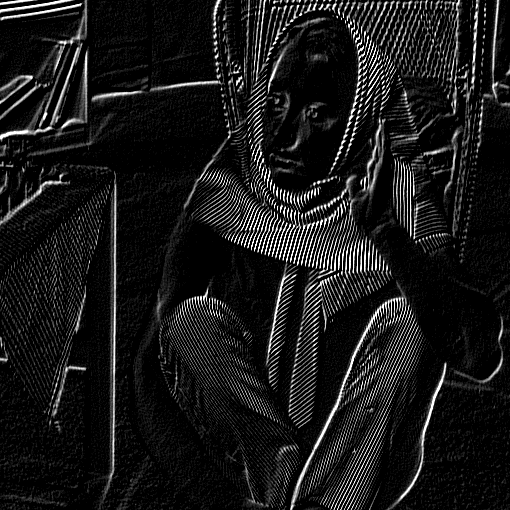

In [20]:
cv2_imshow(pedimg)

## LoG

In [21]:
class logEdgeDetector:
    def __init__(self):
        self.lap = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

    def convolution2d(self, image, kernel, bias=0):
        kernel = np.flip(kernel)
        m, n = kernel.shape
        if (m == n):
            y, x = image.shape
            y = y - m + 1
            x = x - m + 1
            new_image = np.zeros((y,x))
            for i in tqdm(range(y)):
                for j in range(x):
                    new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
        return new_image
    
    def gaussian_kernel(self, size, sigma=1):
        size = int(size) // 2
        x, y = np.mgrid[-size:size+1, -size:size+1]
        normal = 1 / (2.0 * np.pi * sigma**2)
        g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
        return g
    
    def detect(self,img):
        kernel = self.gaussian_kernel(size =5)
        imgg = self.convolution2d(img,kernel)
        imglog = self.convolution2d(imgg,self.lap)
        return imglog
    

In [22]:
loged = logEdgeDetector()
limg = loged.detect(img)

100%|██████████| 506/506 [00:02<00:00, 202.42it/s]


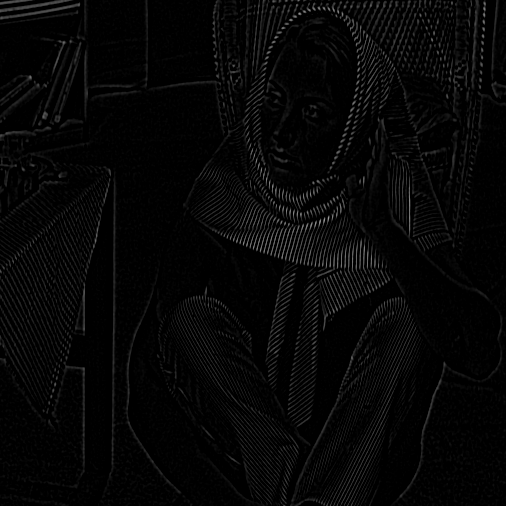

In [23]:
cv2_imshow(limg)

## run all

In [24]:
%mkdir sobel
%mkdir canny
%mkdir prewitt
%mkdir LoG

In [25]:
# im1 = im1.save("geeks.jpg")

In [26]:
for name in filenames:
    img = cv2.imread(name,cv2.IMREAD_GRAYSCALE)

    sed = sobelEdgeDetector()
    sedimg = sed.detect(img)
    cv2.imwrite("sobel/"+name, sedimg)

    loged = logEdgeDetector()
    limg = loged.detect(img)
    cv2.imwrite("LoG/"+name, limg)

    ped = prewittEdgeDetector()
    pedimg = ped.detect(img)
    cv2.imwrite("prewitt/"+name, pedimg)

    ced = cannyEdgeDetector()
    cedimg = sed.detect(img)
    cv2.imwrite("canny/"+name, cedimg)


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 200.58it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:03<00:00, 139.23it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 219.24it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 226.07it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 200.98it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 242.37it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 220.89it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:03<00:00, 151.76it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 188/188 [00:00<00:00, 487.32it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 192/192 [00:00<00:00, 499.77it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 243.62it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 246.04it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 243.18it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 243.50it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 244.03it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 239.43it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 243.66it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 247.31it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 241.49it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 231.02it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 239.21it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 242.63it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 241.14it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 246.30it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 243.47it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 245.86it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:03<00:00, 162.18it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:03<00:00, 162.54it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 240.56it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 244.04it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 241.33it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 242.00it/s]


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


100%|██████████| 506/506 [00:02<00:00, 242.25it/s]


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] 

 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


100%|██████████| 510/510 [00:02<00:00, 244.40it/s]


In [27]:
%cd ..
!pwd
!ls


/content/HW4-data
/content/HW4-data
 baby.mp4  'edge folder'   F22.mp4


In [28]:
from google.colab import files
!zip -r 'edge folder output.zip' 'edge folder' 

  adding: edge folder/ (stored 0%)
  adding: edge folder/boat.png (deflated 0%)
  adding: edge folder/lena.bmp (deflated 64%)
  adding: edge folder/prewitt/ (stored 0%)
  adding: edge folder/prewitt/boat.png (deflated 0%)
  adding: edge folder/prewitt/lena.bmp (deflated 65%)
  adding: edge folder/prewitt/barbara.bmp (deflated 62%)
  adding: edge folder/prewitt/livingroom.tif (deflated 79%)
  adding: edge folder/prewitt/walkbridge.tif (deflated 77%)
  adding: edge folder/prewitt/cameraman.tif (deflated 82%)
  adding: edge folder/prewitt/house.tif (deflated 86%)
  adding: edge folder/prewitt/jetplane.tif (deflated 81%)
  adding: edge folder/prewitt/woman_darkhair.tif (deflated 83%)
  adding: edge folder/prewitt/pirate.tif (deflated 79%)
  adding: edge folder/prewitt/lake.tif (deflated 79%)
  adding: edge folder/prewitt/mandril_gray.tif (deflated 77%)
  adding: edge folder/prewitt/woman_blonde.tif (deflated 79%)
  adding: edge folder/prewitt/tulips.png (deflated 0%)
  adding: edge folder/

In [29]:
files.download("edge folder output.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Q2



In [30]:
!pwd
!ls

/content/HW4-data
 baby.mp4  'edge folder'  'edge folder output.zip'   F22.mp4


In [31]:
vidcap = cv2.VideoCapture('F22.mp4')
success,image = vidcap.read()
count = 0
originals = []
while success:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    originals.append(gray)
    success,image = vidcap.read()

In [32]:
# first_run = False
# if first_run:
    # originals = imgs[:]
originals = np.array(originals[:])
imgs = originals[:]
imgs = np.array(imgs) 

In [33]:
def show_samples(imgs,special_ids = [5,500,-5]):
    for i in special_ids:
        # print(len(imgs),len(imgs[0]),len(imgs[0][0]))
        print(imgs[i].shape)
        cv2_imshow(imgs[i])

In [34]:
#denoising
def denoiser(imgs):
    kernel = np.ones((5,5))/25
    imgs_temp = []
    for img in tqdm(imgs):
        imgs_temp.append(cv2.filter2D(img,-1,kernel))
    imgs = imgs_temp[:]
    return imgs

In [35]:
def thresholder(imgs,th=70):
    imgs = np.copy(imgs)
    imgs_temp = []
    for img in tqdm(imgs):
        img[img<th] = th
        img -= th
        imgs_temp.append(img)
    imgs = imgs_temp[:]
    return imgs

In [36]:
def erod_dilate(imgs):
    out = []
    for a in imgs:
        kernel1 = np.ones((5,5))
        a = cv2.erode(a, kernel1)
        a = cv2.dilate(a, kernel1)
        out.append(a)
    return np.array(out)

In [37]:
def remove_left_hand(imgs):
    a = imgs[:]
    a[:,:,0:40]=0
    return a

100%|██████████| 1287/1287 [00:00<00:00, 17612.26it/s]


(240, 426)


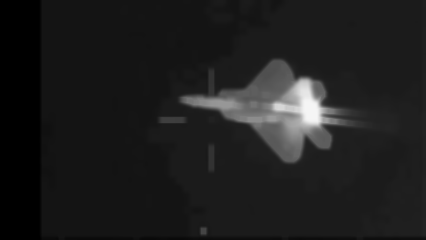

(240, 426)


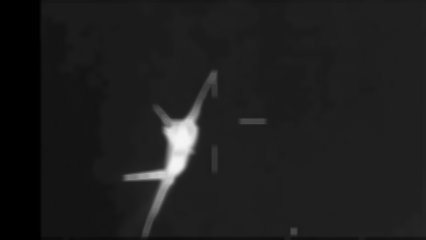

(240, 426)


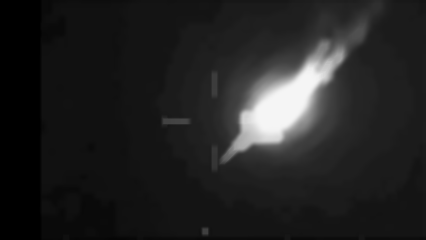

In [38]:
imgs = np.copy(originals)
imgs = remove_left_hand(imgs[:])
# show_samples(imgs)
imgs = denoiser(imgs)
imgs = thresholder(imgs,th=10)
imgs = erod_dilate(imgs[:])

show_samples(imgs)

In [39]:
def edge(images):
    images = np.copy(images)
    out = []
    for a in images:
        a = cv2.GaussianBlur(a, (5, 5), 0)
        a = cv2.Canny(a, 50, 50)
        out.append(a)
    return np.array(out)

(240, 426)


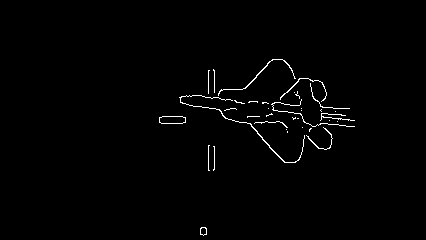

(240, 426)


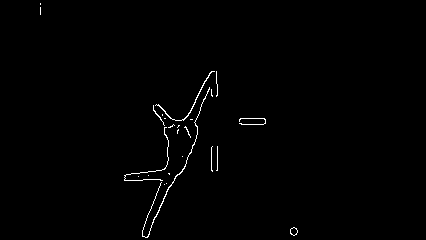

(240, 426)


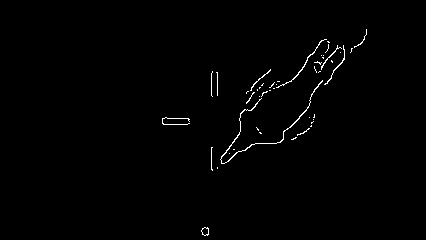

In [40]:
imgs2 = imgs[:]
imgs2 = edge(imgs2[:])
show_samples(imgs2)

--2022-06-09 12:48:26--  https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/blacked.png?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/raw/main/blacked.png [following]
--2022-06-09 12:48:26--  https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/raw/main/blacked.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/main/blacked.png [following]
--2022-06-09 12:48:26--  https://raw.githubusercontent.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/main/blacked.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent

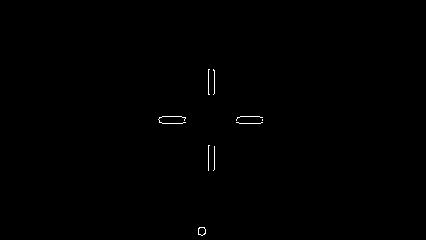

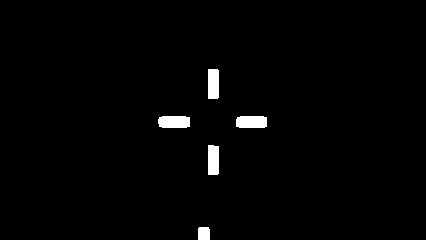

In [83]:
!wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/blacked.png?raw=true

shablon = 'blacked.png?raw=true'
shablon = cv2.imread(shablon,cv2.IMREAD_GRAYSCALE)
cv2_imshow(shablon)

kernel1 = np.ones((6,6))
shablon = cv2.dilate(shablon, kernel1)
shablon = cv2.dilate(shablon, kernel1)
shablon = cv2.erode(shablon, kernel1)
kernel2 = np.ones((2,2))
shablon = cv2.erode(shablon, kernel2)
cv2_imshow(shablon)



In [86]:
def shabloner(imgs,shablon):
    zs = imgs[:]
    out = []
    for z in tqdm(zs):
        z = z-shablon
        z[z<0] = 0 
        out.append(z)

    return np.array(out)

100%|██████████| 1287/1287 [00:00<00:00, 17252.46it/s]

(240, 426)


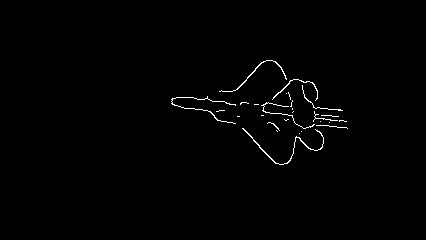

(240, 426)


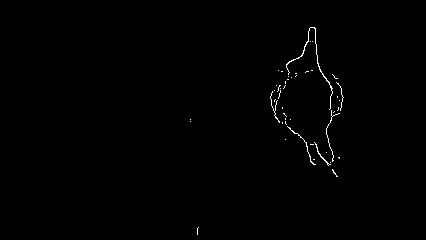

(240, 426)


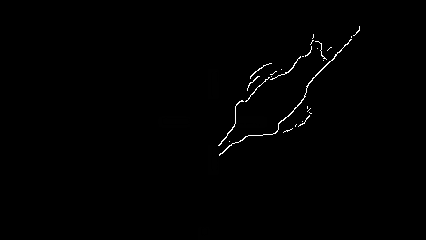

In [87]:
imgs3 = np.copy(imgs2)
imgs3 = shabloner(imgs3,shablon)
show_samples(imgs3,[1,1000,-1])

In [97]:
out = []
for i in tqdm(range(len(originals))):
    o = np.copy(originals[i].transpose())
    r = o[:]
    g = o[:]
    b = o[:]

    im = np.copy(imgs3[i].transpose() )
    r = np.array(r, dtype=np.float64)
    b = np.array(b, dtype=np.float64)
    g = np.array(g, dtype=np.float64)

    # b *= im
    # b *= im
    im[:45,:]=0
    g[im>100] = 255
    
    r[im>100] = 0
    b[im>100] = 0

    # r[im>0] = 0
    # b[im>0] = 0


    out.append(np.array([r,g,b]).transpose())

out = np.array(out)

100%|██████████| 1287/1287 [00:02<00:00, 625.74it/s]


(240, 426, 3)


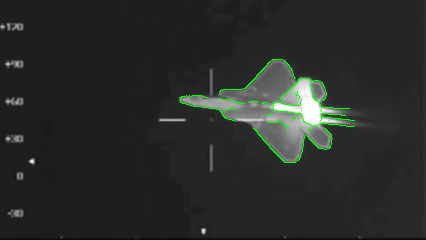

(240, 426, 3)


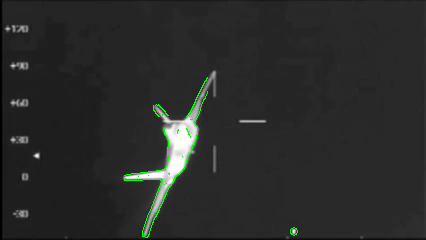

(240, 426, 3)


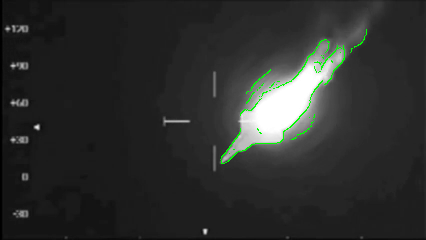

In [98]:
show_samples(out)

In [100]:
import os
import moviepy.video.io.ImageSequenceClip as mvii

fps=25

out2 = [i for i in out]
clip = mvii.ImageSequenceClip(out2, fps=fps)
clip.write_videofile('F22_edged.mp4')

[MoviePy] >>>> Building video F22_edged.mp4
[MoviePy] Writing video F22_edged.mp4


100%|██████████| 1287/1287 [00:09<00:00, 139.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: F22_edged.mp4 

